In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def arma_11(p0,p1,t1,ss,n):
    L=[]
    w=np.random.normal(0,ss**0.5,n+1)
    x0=0
    for t in range(1,n+1):
        xt=p0+p1*x0+w[t]+t1*w[t-1]
        L.append(xt)
        x0=xt
    return L

In [3]:
ar1=arma_11(1,0.6,0,1,500)

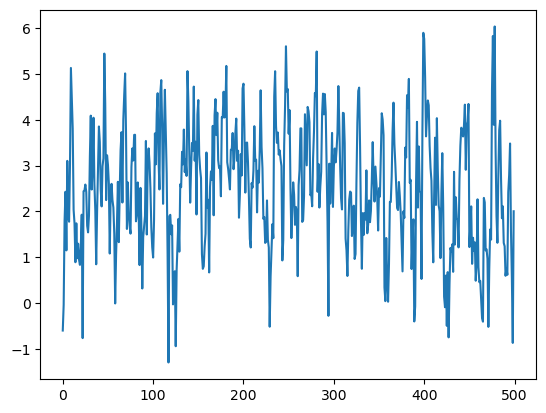

In [6]:
plt.plot(ar1)
plt.show()

In [8]:
def yw_ar_1(D):
    n=len(D)
    X=np.array(D)-np.mean(D)
    hat_p1=sm.tsa.stattools.acf(X)[1]
    hat_p0=np.mean(D)*(1-hat_p1)
    return hat_p0, hat_p1

In [12]:
def ERROR_one_step_forecast_yw1(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        yw = yw_ar_1(INS)
        Xt = INS[-1]
        Fore_one = mu + yw[1]*(Xt-mu)
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    print('MAE = ',MAE,
          'RMSE = ',RMSE)
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()

MAE =  1.0863023869672253 RMSE =  1.2845577883426176


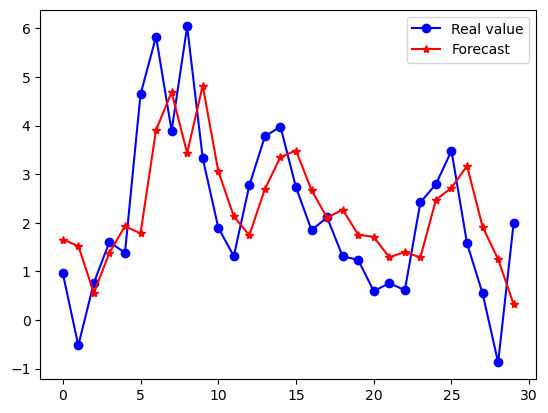

In [16]:
ERROR_one_step_forecast_yw1(ar1,30)

In [17]:
def yw_ar_2(D):
    n=len(D)
    X=np.array(D)-np.mean(D)
    rho=sm.tsa.stattools.acf(X)
    B=np.zeros((2,1))
    A=np.zeros((2,2))
    for i in range(2):
        B[i][0]=rho[i+1]
        for j in range(2):
            A[i][j]=rho[i-j]
    A_inv=np.linalg.inv(np.array(A))
    B=np.array(B)
    phi=np.dot(A_inv, B)
    p1,p2=phi
    p0=np.mean(D)*(1-p1-p2)
    return p0,p1,p2

In [18]:
def ERROR_one_step_forecast_yw2(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        yw = yw_ar_2(INS)
        Xt = INS[-1]
        Xt1 = INS[-2]
        Fore_one = yw[0]+yw[1]*Xt+yw[2]*Xt1
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    print('MAE = ',MAE,
          'RMSE = ',RMSE)
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()

MAE =  1.0850615484878956 RMSE =  1.2852979631031896


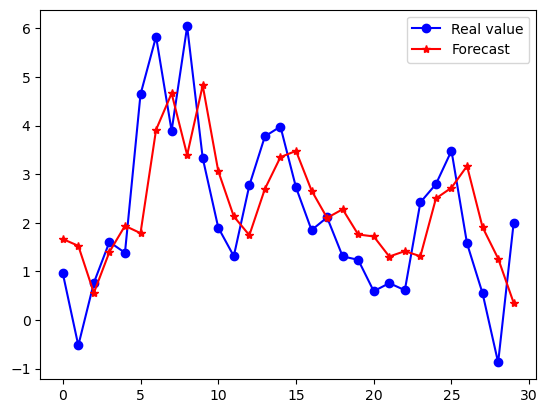

In [19]:
ERROR_one_step_forecast_yw2(ar1,30)